Question-1 :- What is the difference between multithreading and multiprocessing?

Answer-1 :- The difference between multithreading and multiprocessing lies in how they achieve parallel execution and how they use system resources such as CPU and memory.
 - Definition:-
    - Multithreading:- It involves running multiple threads within the same process. These threads share the same memory space and resources.
    - Multiprocessing:- It involves running various processes, each with its own memory space. Each process runs independently and does not share memory by default.
 - Resource Sharing:-
    - Multithreading:- Threads share the same memory and data. Communication between threads is faster but can lead to race conditions if not managed properly.
    - Multiprocessing:- Processes have separate memory spaces. Communication between processes is slower and usually done through mechanisms like pipes, queues, or shared memory.
 - Performance:-
    - Multithreading:- Best suited for I/O-bound tasks, such as reading files or making network requests, because the threads can run while waiting for input or output operations.In Python, multithreading is limited by the Global Interpreter Lock (GIL), meaning only one thread executes Python bytecode at a time.
    - Multiprocessing:- 	Ideal for CPU-bound tasks, such as data processing or mathematical calculations, because each process can run on a separate CPU core without being limited by the GIL.
 - Memory Usage:-
    - Multithreading:- Uses less memory since all threads share the same memory space.
    - Multiprocessing:- Uses more memory since each process maintains its own memory space.
 - Example :- Multithreading is like multiple workers sharing the same desk, while multiprocessing is like each worker having their own desk and office. Both can work in parallel, but the setup and communication differ depending on the nature of the job

Question-2 :- What are the challenges associated with memory management in Python?

Answer-2 :- Memory management in Python is designed to be automatic, but it still presents several challenges that developers should understand to write efficient programs. Python handles memory through a built-in garbage collector, a private heap space, and reference counting, but each of these mechanisms has limitations that can affect performance and reliability.
 - Reference Counting and Circular References :-
   - Python primarily uses reference counting to track how many variables refer to an object. When the reference count of an object drops to zero, the memory it occupies is released. However, when two or more objects reference each other, they form a circular reference.
   - For example, if object A references object B and B references A, their reference counts never reach zero, even if nothing else refers to them. This creates a memory leak, meaning memory that is no longer needed but not released. Python’s garbage collector can detect and clean up many circular references, but not all—especially if custom destructors (__del__ methods) are defined.
 - Fragmentation of Memory :-
   - Memory fragmentation occurs when memory is divided into many small, non-contiguous blocks. Python’s memory allocator (pymalloc) manages small objects efficiently but can lead to fragmentation over time. Fragmentation reduces performance because large continuous memory blocks may become unavailable, even if there is enough total free memory. This problem becomes more visible in long-running applications such as servers.
 - Overhead of Object Management :-
   - Every object in Python carries additional memory overhead beyond the data it holds.
   - For example, a simple integer in Python is actually a full-fledged object with type information, reference count, and value. This overhead increases total memory usage significantly, especially when working with large collections of small objects. As a result, Python can be less memory-efficient compared to languages like C or C++.
 - Inefficient Use of Containers :-
   - Lists, dictionaries, and sets are very flexible data structures in Python, but they can use more memory than expected. Lists over-allocate memory to reduce the cost of resizing, and dictionaries store additional metadata to ensure fast lookups. When these structures hold large numbers of elements, their memory footprint grows rapidly. Developers often mitigate this by using more memory-efficient alternatives, such as generators, array objects, or libraries like NumPy that use compact C-based storage.
 - Global Interpreter Lock (GIL) Interaction :-
   - Although the GIL is primarily a concurrency limitation, it also affects memory management. Because only one thread executes Python bytecode at a time, memory operations (like allocation and deallocation) are serialized. This simplifies memory management but reduces the efficiency of memory usage in multi-threaded programs that could otherwise benefit from true parallelism.
 - Unintentional Object Retention :-
   - Sometimes, memory is not released simply because references are held unintentionally.
   - For example, global variables, cached objects, closures, or data stored in lists that are never cleared can keep references alive indefinitely. These “hidden” references prevent the garbage collector from reclaiming memory, leading to slow, memory-hungry applications.
 - Garbage Collection Overhead :-
   - Python’s cyclic garbage collector periodically searches for and removes unused objects. However, this process can pause program execution briefly, especially when dealing with large numbers of objects. If not managed properly, these pauses can cause performance issues in real-time or high-throughput applications.
  
  



In [1]:
# Question-3 :- Write a Python program that logs an error message to a log file when a division by zero exception occurs ?
# Answer-3 :-
import logging
logging.basicConfig(filename='error_log.log', level=logging.ERROR,
                    format='%(asctime)s - %(levelname)s - %(message)s')
try:
    x = 10
    y = 0
    result = x / y
except ZeroDivisionError as e:
    logging.error("Division by zero error occurred: %s", e)


ERROR:root:Division by zero error occurred: division by zero


In [6]:
# Question-4 :- Write a Python program that reads from one file and writes its content to another file?
# Answer-4 :-
# Create a dummy source file for demonstration
with open("source.txt", "w") as f:
    f.write("This is the content of the source file.")
import shutil

shutil.copyfile("source.txt", "destination.txt")

print("File copied successfully using shutil.")


File copied successfully using shutil.


In [7]:
# Question-5 :- Write a program that handles both IndexError and KeyError using a try-except block .
# Answer-5 :-
try:
    my_list = [10, 20, 30]
    my_dict = {"a": 1, "b": 2}
    print(my_list[5])
    print(my_dict["z"])
except (IndexError, KeyError) as error:
    print("An error occurred:", error)


An error occurred: list index out of range


Question-6:- What are the differences between NumPy arrays and Python lists?

Answer-6 :- NumPy arrays and Python lists may look similar because both can store collections of data, but they are fundamentally different in how they store, manage, and process information. Understanding these differences is essential for writing efficient and high-performance Python code, especially in data analysis, machine learning, and scientific computing.

 - Data Type Consistency :-
   - NumPy Arrays :- All elements in a NumPy array must be of the same data type (for example, all integers or all floats). This uniformity allows NumPy to store data more compactly and perform operations faster.
   - Python Lists :- Elements in a list can have mixed data types (for example, integers, strings, and floats in the same list). This flexibility comes at the cost of slower performance.
 - Memory Efficiency :-
   - NumPy Arrays :- NumPy uses contiguous memory blocks and stores elements in a compact binary format. This makes NumPy arrays more memory-efficient and faster to access.
   - Python Lists :- Lists store references to objects scattered across memory. This makes them more memory-intensive and slower to traverse.
 - Performance and Speed :-
   - NumPy Arrays :- Operations on arrays are executed in compiled C code, making them many times faster than Python lists. NumPy also supports vectorization, meaning operations are applied to all elements without explicit loops.
   - Python Lists :- Operations on lists require explicit loops in Python, which are slower due to Python’s interpreter overhead.
 - Functionality and Operations :-
   - NumPy Arrays :- Support element-wise arithmetic, matrix operations, broadcasting, and a large set of mathematical functions (sum(), mean(), std(), etc.).
   - Python Lists :- Do not support element-wise arithmetic directly. Operations must be done using loops or comprehensions.
 - Dimensionality and Shape :-
   - NumPy Arrays :- Can represent multidimensional data (for example, matrices and tensors). You can reshape and slice them efficiently.
   - Python Lists :- Only naturally support one-dimensional structures. Nested lists can represent matrices, but operations on them are slower and more complex.
 - Built-in Methods and Mathematical Support :-
   - NumPy Arrays :- Provide a rich set of mathematical and statistical operations that are optimized for large-scale computation.
   - Python Lists :- Only support basic operations such as append, remove, or sort; advanced mathematical operations require explicit code or external libraries.
 - Type of Storage :-
   - NumPy Arrays: Store raw binary data in homogeneous blocks.
   - Python Lists: Store pointers (references) to objects in memory, meaning each element can occupy a different memory location and size.
 - Broadcasting and Advanced Indexing :-
   - NumPy Arrays: Allow broadcasting, where operations automatically expand smaller arrays to match larger shapes without extra memory allocation.
   - Python Lists: Do not support broadcasting. Each operation must be manually coded using loops.

question-7 :- Explain the difference between apply() and map() in Pandas.

Answer-7 :- Both apply() and map() in Pandas are used to perform operations on data, but they differ in how, where, and to what they are applied. Understanding the distinction helps you choose the right function for efficient and readable data transformations.
- Basic Concept :-
  - map() is used only with Pandas Series (a single column). It applies a function, dictionary, or mapping to each element in that Series.
  - apply() can be used with both Series and DataFrames. It applies a function either element-wise (for Series) or along rows or columns (for DataFrames).
- Using map() on a Series :-
  - The map() function works on a single column (Series) and transforms each value independently
  - example :- Using a function :-
import pandas as pd
s = pd.Series([1, 2, 3, 4])
result = s.map(lambda x: x * 2)
print(result)

- Using apply() on a Series :-
  - When used with a Series, apply() behaves similarly to map().
It applies a function to each element, but it is slightly more flexible.apply() is more general than map() because it can handle more complex functions and operations involving conditions or multiple arguments.
  - example :-
s = pd.Series([10, 20, 30])

result = s.apply(lambda x: x / 10)
print(result)

- Using apply() on a DataFrame :-
  - This is where apply() becomes more powerful.
It can be applied to entire rows or columns of a DataFrame using the axis parameter.
  - axis=0 applies the function to each column.
  - axis=1 applies the function to each row.
  - example :- Apply to each column :-
  import pandas as pd
df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6]
})

result = df.apply(sum, axis=0)
print(result)




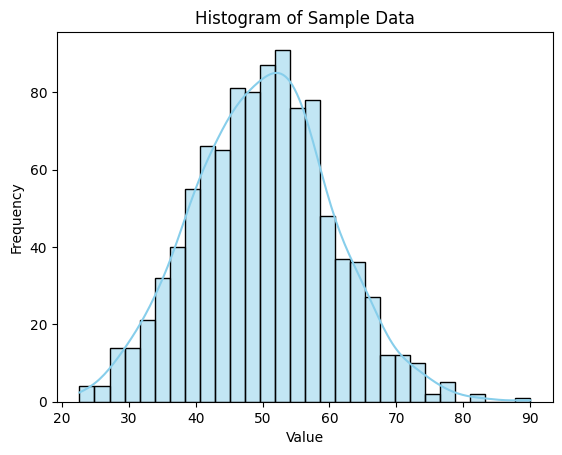

In [9]:
# Questio-8 :- Create a histogram using Seaborn to visualize a distribution.
# Answer-8 :-
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
data = np.random.normal(loc=50, scale=10, size=1000)
sns.histplot(data, bins=30, kde=True, color='skyblue')
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of Sample Data")
plt.show()


In [11]:
# Question-9 :- Use Pandas to load a CSV file and display its first 5 rows.
# answer-9 :-
import pandas as pd

data = {'col1': [1, 2, 3], 'col2': [4, 5, 6]}
dummy_df = pd.DataFrame(data)
dummy_df.to_csv("your_file.csv", index=False)

print("Dummy 'your_file.csv' created.")
import pandas as pd
df = pd.read_csv("your_file.csv")
print(df.head())


Dummy 'your_file.csv' created.
   col1  col2
0     1     4
1     2     5
2     3     6


      col1  col2
col1   1.0   1.0
col2   1.0   1.0


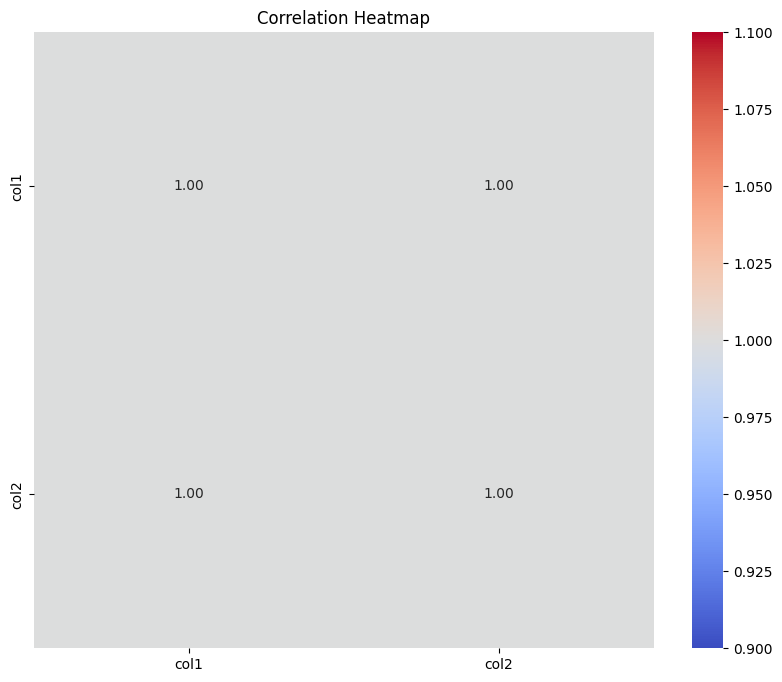

In [13]:
# Question-10 :- Calculate the correlation matrix using Seaborn and visualize it with a heatmap.
# Answer-10 :-
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("your_file.csv")
correlation_matrix = df.corr()
print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()
